# Flight Travel Satisfaction

### Domain
- Air travel, Transport, Consumer Satisfaction

### Business Context
Customer satisfaction is an important factor for a business. Happy customers bring value and revenue. For the airline industry, cost and customer satisfaction plays a pivotal role. It’s important that customers have an excellent experience every time they travel.
The data we have at hand is of passengers and their feedback regarding their flight experience. Each row is one passenger. Apart from the feedback from the customers across various attributes(15 in total) like food, online_support, cleanliness etc, we have data about the customers' age, loyalty to the airline, gender and class.
The target column is a binary variable which tells us if the customer is satisfied or neutral/dissatisfied.
We will analyse various features to understand which features are contributing to the satisfaction of the customers.


### Dataset description

- Flight_data.csv : (90917, 9)
1. ID : Unique id for a passenger
2. Gender: Gender of the passenger
3. CustomerType: Type of customer
4. Age: Age of the passenger
5. TypeTravel : Type of travel ( Personal /Business) 6. Class : Trvale class
7. Flight_Distance : Distance of the journey
8. DepartureDelayin_Mins : Delay in departure
9. ArrivalDelayin_Mins: Delay in arrival

- Survey_data.csv : (90917, 16)
1. Id : unique id for a passenger
2. Satisfaction: satisfaction of the passenger
3. Seat_comfort: how is seat comfort
4. Departure.Arrival.time_convenient : feedback on time convenient 
5. Food_drink : feedback on food and drink services
6. Gate_location : feedback on gate location
7. Inflightwifi_service: feedback on inflight internet service
8. Inflight_entertainment : feedback on inflight internet service
9. Online_support : feedback on online support from the airline
10. Ease_of_Onlinebooking: feedback on booking facilities
11. Onboard_service : feedback on onboarding services
12. Leg_room_service: how is legroom in the flight
13. Baggage_handling: feedback on handling baggage
14. Checkin_service : feedback on check-in services
15. Cleanliness: feedback on cleanliness and hygiene
16. Online_boarding: feedback on online boarding services


### Objective of this project
1. Here the objective is to utlize Mongodb to perform some basic operations of the given dataset and then save the final processed dataset in the form of csv.
2. Utilize the saved dataset to do basic pandas operation, tarin and test a supervized learning models and pickle the best model
3. Utilize MLFlow to register and serve the model with an endpoint

### Install mongodb in python
- !pip install pymongo

In [1]:
## PyMongo is a Python library containing tools for working with MongoDB.
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017/")  ## Connecting with Mongodb server and creating a client to interact with mongodb server.

In [2]:
## To view the list of databases names available in the mongodb.
client.list_database_names()

['Flight_db', 'admin', 'config', 'local', 'movies-db', 'test']

In [3]:
### Here we are going to utilize Flight_db
db = client.Flight_db

In [4]:
# Let us check how many collections are there in the db
db.collection_names()

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  


['flight_data', 'survey_data']

- There are two collections inside the 'db' named 'flight_data' and 'survey_data'. Let's explore the collections and see what data is inside.

In [5]:
# printing a sample data from the first collection 
data1 = db['flight_data']
print(data1.find_one())
print('-'*150)
data2 = db['survey_data']
print(data2.find_one())

# For printing all the data use the below command
#for i in data1.find():
#    print(i)

{'_id': ObjectId('63c7c26045647da6c3d88be4'), 'ID': '149965', 'Gender': 'Female', 'CustomerType': 'Loyal Customer', 'Age': '65', 'TypeTravel': 'Personal Travel', 'Class': 'Eco', 'Flight_Distance': '265', 'DepartureDelayin_Mins': '0', 'ArrivalDelayin_Mins': '0'}
------------------------------------------------------------------------------------------------------------------------------------------------------
{'_id': ObjectId('63c7c40445647da6c3db5232'), 'Id': '198671', 'Satisfaction': 'neutral or dissatisfied', 'Seat_comfort': 'poor', 'Departure': {'Arrival': {'time_convenient': 'acceptable'}}, 'Food_drink': 'acceptable', 'Gate_location': 'manageable', 'Inflightwifi_service': 'poor', 'Inflight_entertainment': 'need improvement', 'Online_support': 'poor', 'Ease_of_Onlinebooking': 'poor', 'Onboard_service': 'acceptable', 'Leg_room_service': 'acceptable', 'Baggage_handling': 'poor', 'Checkin_service': 'need improvement', 'Cleanliness': 'need improvement', 'Online_boarding': 'poor'}


In [6]:
# print the total number of documents in the collection

print ("total docs in flight_data collection:", data1.count_documents( {} ))
print ("total docs in survey_data collection:", data2.count_documents( {} ))

total docs in flight_data collection: 90917
total docs in survey_data collection: 90917


In [7]:
# print the total number of documents returned in a MongoDB collection
cursor1 = data1.find()
data1_list = list(cursor1)
print(data1_list[0:5])
print ("Total docs returned by find() for flight_data:", len(data1_list))
print('-'*150)

cursor2 = data2.find()
data2_list = list(cursor2)
print(data2_list[0:5])
print ("Total docs returned by find() for flight_data:", len(data2_list))


[{'_id': ObjectId('63c7c26045647da6c3d88be4'), 'ID': '149965', 'Gender': 'Female', 'CustomerType': 'Loyal Customer', 'Age': '65', 'TypeTravel': 'Personal Travel', 'Class': 'Eco', 'Flight_Distance': '265', 'DepartureDelayin_Mins': '0', 'ArrivalDelayin_Mins': '0'}, {'_id': ObjectId('63c7c26045647da6c3d88be5'), 'ID': '149966', 'Gender': 'Female', 'CustomerType': 'Loyal Customer', 'Age': '15', 'TypeTravel': 'Personal Travel', 'Class': 'Eco', 'Flight_Distance': '2138', 'DepartureDelayin_Mins': '0', 'ArrivalDelayin_Mins': '0'}, {'_id': ObjectId('63c7c26045647da6c3d88be6'), 'ID': '149967', 'Gender': 'Female', 'CustomerType': 'Loyal Customer', 'Age': '60', 'TypeTravel': 'Personal Travel', 'Class': 'Eco', 'Flight_Distance': '623', 'DepartureDelayin_Mins': '0', 'ArrivalDelayin_Mins': '0'}, {'_id': ObjectId('63c7c26045647da6c3d88be7'), 'ID': '149968', 'Gender': 'Female', 'CustomerType': 'Loyal Customer', 'Age': '70', 'TypeTravel': 'Personal Travel', 'Class': 'Eco', 'Flight_Distance': '354', 'Depa

In [8]:
# Converting the list to dataframe

import numpy as np
import pandas as pd
df1 = pd.DataFrame(data1_list) 
df2 = pd.DataFrame(data2_list)
df1.head()

,_id,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,63c7c26045647da6c3d88be4,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0
1,63c7c26045647da6c3d88be5,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0
2,63c7c26045647da6c3d88be6,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0
3,63c7c26045647da6c3d88be7,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0
4,63c7c26045647da6c3d88be8,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0


In [9]:
df2.head()

,_id,Id,Satisfaction,Seat_comfort,Departure,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,63c7c40445647da6c3db5232,198671,neutral or dissatisfied,poor,{'Arrival': {'time_convenient': 'acceptable'}},acceptable,manageable,poor,need improvement,poor,poor,acceptable,acceptable,poor,need improvement,need improvement,poor
1,63c7c40445647da6c3db5233,193378,satisfied,excellent,{'Arrival': {'time_convenient': 'need improvem...,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,acceptable,excellent,acceptable,excellent,acceptable
2,63c7c40445647da6c3db5234,174522,satisfied,good,{'Arrival': {'time_convenient': 'good'}},good,manageable,acceptable,excellent,excellent,need improvement,need improvement,good,need improvement,excellent,need improvement,excellent
3,63c7c40445647da6c3db5235,191830,satisfied,good,{'Arrival': {'time_convenient': 'good'}},good,manageable,poor,good,poor,poor,poor,good,poor,acceptable,acceptable,poor
4,63c7c40445647da6c3db5236,221497,satisfied,good,{'Arrival': {'time_convenient': 'good'}},NaN,Convinient,good,good,good,good,good,good,good,excellent,good,good


In [10]:
print(df1.info())
print('-'*150)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90917 entries, 0 to 90916
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   _id                    90917 non-null  object
 1   ID                     90917 non-null  object
 2   Gender                 90917 non-null  object
 3   CustomerType           81818 non-null  object
 4   Age                    90917 non-null  object
 5   TypeTravel             81829 non-null  object
 6   Class                  90917 non-null  object
 7   Flight_Distance        90917 non-null  object
 8   DepartureDelayin_Mins  90917 non-null  object
 9   ArrivalDelayin_Mins    90917 non-null  object
dtypes: object(10)
memory usage: 6.9+ MB
None
------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90917 entries, 0 to 90916
Data c

#### Observations
- All the feature data types are of  the object, so we have to convert few features with integer values to int/float.
- '_id' is a represnetation from mongodb - unique id given for each observation which can be removed
- 'ID' column is common for both the dataframes which can be used to merge two dataframes together

In [11]:
# Renaming dataframe 2
df2 = df2.rename(columns={'Id': 'ID'})
df2.head()

,_id,ID,Satisfaction,Seat_comfort,Departure,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,63c7c40445647da6c3db5232,198671,neutral or dissatisfied,poor,{'Arrival': {'time_convenient': 'acceptable'}},acceptable,manageable,poor,need improvement,poor,poor,acceptable,acceptable,poor,need improvement,need improvement,poor
1,63c7c40445647da6c3db5233,193378,satisfied,excellent,{'Arrival': {'time_convenient': 'need improvem...,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,acceptable,excellent,acceptable,excellent,acceptable
2,63c7c40445647da6c3db5234,174522,satisfied,good,{'Arrival': {'time_convenient': 'good'}},good,manageable,acceptable,excellent,excellent,need improvement,need improvement,good,need improvement,excellent,need improvement,excellent
3,63c7c40445647da6c3db5235,191830,satisfied,good,{'Arrival': {'time_convenient': 'good'}},good,manageable,poor,good,poor,poor,poor,good,poor,acceptable,acceptable,poor
4,63c7c40445647da6c3db5236,221497,satisfied,good,{'Arrival': {'time_convenient': 'good'}},NaN,Convinient,good,good,good,good,good,good,good,excellent,good,good


In [12]:
# Droping '_id' column in both the dataframes

df1.drop(columns = ['_id'], axis = 1, inplace = True)
df2.drop(columns = ['_id'], axis = 1, inplace = True)

print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90917 entries, 0 to 90916
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     90917 non-null  object
 1   Gender                 90917 non-null  object
 2   CustomerType           81818 non-null  object
 3   Age                    90917 non-null  object
 4   TypeTravel             81829 non-null  object
 5   Class                  90917 non-null  object
 6   Flight_Distance        90917 non-null  object
 7   DepartureDelayin_Mins  90917 non-null  object
 8   ArrivalDelayin_Mins    90917 non-null  object
dtypes: object(9)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90917 entries, 0 to 90916
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      90917 non-null  object
 1   Satisfaction    

In [13]:
# Lets merge the dataframe using 'ID' column

df = pd.merge(df1, df2, on='ID', sort = False)
df.head()

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,...,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,satisfied,...,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,satisfied,...,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,satisfied,...,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


In [14]:
# Checking the dataframes of three dataframes
print(df1.shape)
print(df2.shape)
print(df.shape)

(90917, 9)
(90917, 16)
(90917, 24)


In [15]:
# Saving the merged dataframe for future use if needed
df.to_csv('data/dataset.csv', index = False)

### Start from here

In [16]:
# Loading the dataframe back again for further processing
import numpy as np
import pandas as pd

df = pd.read_csv('data/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90917 entries, 0 to 90916
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      90917 non-null  int64  
 1   Gender                  90917 non-null  object 
 2   CustomerType            81818 non-null  object 
 3   Age                     90917 non-null  int64  
 4   TypeTravel              81829 non-null  object 
 5   Class                   90917 non-null  object 
 6   Flight_Distance         90917 non-null  int64  
 7   DepartureDelayin_Mins   90917 non-null  int64  
 8   ArrivalDelayin_Mins     90633 non-null  float64
 9   Satisfaction            90917 non-null  object 
 10  Seat_comfort            90917 non-null  object 
 11  Departure               82673 non-null  object 
 12  Food_drink              82736 non-null  object 
 13  Gate_location           90917 non-null  object 
 14  Inflightwifi_service    90917 non-null

In [17]:
### Identifying categorical and numerical columns

cat_col = []
num_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('\n Numerical Columns:', num_col)
print('\n Categorical Columns:', cat_col)


 Numerical Columns: ['ID', 'Age', 'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

 Categorical Columns: ['Gender', 'CustomerType', 'TypeTravel', 'Class', 'Satisfaction', 'Seat_comfort', 'Departure', 'Food_drink', 'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']


In [18]:
df.isnull().sum()

ID                           0
Gender                       0
CustomerType              9099
Age                          0
TypeTravel                9088
Class                        0
Flight_Distance              0
DepartureDelayin_Mins        0
ArrivalDelayin_Mins        284
Satisfaction                 0
Seat_comfort                 0
Departure                 8244
Food_drink                8181
Gate_location                0
Inflightwifi_service         0
Inflight_entertainment       0
Online_support               0
Ease_of_Onlinebooking        0
Onboard_service           7179
Leg_room_service             0
Baggage_handling             0
Checkin_service              0
Cleanliness                  0
Online_boarding              0
dtype: int64

#### Only 'ArrivalDelayin_Mins' is the numerical column which has missing values. We can replace missing values for those features using median. For other features, the count of missing values is around 10% of the original data, so either we can remove that feature or we can replace it with a specific value like 'missing'

In [23]:
df['ArrivalDelayin_Mins'] = df['ArrivalDelayin_Mins'].fillna(df['ArrivalDelayin_Mins'].mean()).astype(int)
df.fillna('missing', inplace=True)
df.isnull().sum()

ID                        0
Gender                    0
CustomerType              0
Age                       0
TypeTravel                0
Class                     0
Flight_Distance           0
DepartureDelayin_Mins     0
ArrivalDelayin_Mins       0
Satisfaction              0
Seat_comfort              0
Departure                 0
Food_drink                0
Gate_location             0
Inflightwifi_service      0
Inflight_entertainment    0
Online_support            0
Ease_of_Onlinebooking     0
Onboard_service           0
Leg_room_service          0
Baggage_handling          0
Checkin_service           0
Cleanliness               0
Online_boarding           0
dtype: int64

In [25]:
# Check for special characters in the dataframe

from colorama import Fore, Back, Style
for j in cat_col: 
    print(Fore.YELLOW+'\n column:', j)
    print(Fore.WHITE+'\n',df[df[j].str.contains(r"[{}''@#&$%+-/*]")])
    print(Fore.LIGHTBLUE_EX+'-'*150)


 column: Gender

 Empty DataFrame
Columns: [ID, Gender, CustomerType, Age, TypeTravel, Class, Flight_Distance, DepartureDelayin_Mins, ArrivalDelayin_Mins, Satisfaction, Seat_comfort, Departure, Food_drink, Gate_location, Inflightwifi_service, Inflight_entertainment, Online_support, Ease_of_Onlinebooking, Onboard_service, Leg_room_service, Baggage_handling, Checkin_service, Cleanliness, Online_boarding]
Index: []

[0 rows x 24 columns]
------------------------------------------------------------------------------------------------------------------------------------------------------

 column: CustomerType

 Empty DataFrame
Columns: [ID, Gender, CustomerType, Age, TypeTravel, Class, Flight_Distance, DepartureDelayin_Mins, ArrivalDelayin_Mins, Satisfaction, Seat_comfort, Departure, Food_drink, Gate_location, Inflightwifi_service, Inflight_entertainment, Online_support, Ease_of_Onlinebooking, Onboard_service, Leg_room_service, Baggage_handling, Checkin_service, Cleanliness, Online_boardi

#### On checking the output, only 'Departure' feature has special characters, which has to be sorted

In [26]:
# Splitting 'Departure' feature into 3 parts to create a proper feature
df[['arrival', 'time', 'departure']] = df.Departure.str.split(":", expand = True)
df['departure'] = df['departure'].str.replace("[\*}}'/',]", '', regex=True)
df.drop(columns=['arrival', 'time', 'Departure'], axis=1, inplace=True)  ### As these columns are not needed for further processing
df.head()

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,...,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,departure
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,satisfied,...,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement,extremely poor
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,satisfied,...,extremely poor,need improvement,need improvement,missing,acceptable,good,good,good,need improvement,extremely poor
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,satisfied,...,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable,None
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,satisfied,...,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent,extremely poor
4,149969,Male,Loyal Customer,30,missing,Eco,1894,0,0,satisfied,...,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement,extremely poor


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90917 entries, 0 to 90916
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      90917 non-null  int64 
 1   Gender                  90917 non-null  object
 2   CustomerType            90917 non-null  object
 3   Age                     90917 non-null  int64 
 4   TypeTravel              90917 non-null  object
 5   Class                   90917 non-null  object
 6   Flight_Distance         90917 non-null  int64 
 7   DepartureDelayin_Mins   90917 non-null  int64 
 8   ArrivalDelayin_Mins     90917 non-null  int64 
 9   Satisfaction            90917 non-null  object
 10  Seat_comfort            90917 non-null  object
 11  Food_drink              90917 non-null  object
 12  Gate_location           90917 non-null  object
 13  Inflightwifi_service    90917 non-null  object
 14  Inflight_entertainment  90917 non-null  object
 15  On

In [28]:
### Identifying categorical and numerical columns for the modified dataframe

cat_col = []
num_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('\n Numerical Columns:', num_col)
print('\n Categorical Columns:', cat_col)


 Numerical Columns: ['ID', 'Age', 'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

 Categorical Columns: ['Gender', 'CustomerType', 'TypeTravel', 'Class', 'Satisfaction', 'Seat_comfort', 'Food_drink', 'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding', 'departure']


In [30]:
### Now that null values and special characters are removed, let us convert the categorical features to numerical features

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
i = 0
for col in cat_col:
    df[col] = le.fit_transform(df[col])
df.head()

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,...,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,departure
0,149965,0,0,65,1,1,265,0,0,1,...,3,4,0,0,2,0,1,0,4,2
1,149966,0,0,15,1,1,2138,0,0,1,...,2,4,4,4,0,2,3,3,4,2
2,149967,0,0,60,1,1,623,0,0,1,...,3,0,5,6,2,4,3,5,0,6
3,149968,0,0,70,1,1,354,0,0,1,...,0,3,4,5,2,3,3,4,1,2
4,149969,1,0,30,2,1,1894,0,0,1,...,2,4,4,1,3,1,1,3,4,2


In [33]:
# Now that all the features are numerical, let us perform detailed statistical analysis on the data.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,90917.0,195423.000000,26245.621549,149965.0,172694.0,195423.0,218152.0,240881.0
Gender,90917.0,0.491998,0.499939,0.0,0.0,0.0,1.0,1.0
CustomerType,90917.0,0.364277,0.657073,0.0,0.0,0.0,1.0,2.0
Age,90917.0,39.447166,15.129794,7.0,27.0,40.0,51.0,85.0
TypeTravel,90917.0,0.478722,0.670426,0.0,0.0,0.0,1.0,2.0
Class,90917.0,0.594014,0.621997,0.0,0.0,1.0,1.0,2.0
Flight_Distance,90917.0,1981.629442,1026.779932,50.0,1360.0,1927.0,2542.0,6950.0
DepartureDelayin_Mins,90917.0,14.686593,38.669260,0.0,0.0,0.0,12.0,1592.0
ArrivalDelayin_Mins,90917.0,15.058746,38.977502,0.0,0.0,0.0,13.0,1584.0
Satisfaction,90917.0,0.547323,0.497758,0.0,0.0,1.0,1.0,1.0


In [34]:
### Split the dependent and independent features

y = df['Satisfaction']
X = df.drop(columns=['Satisfaction'], axis = 1)

print(X.shape, y.shape)


(90917, 23) (90917,)


In [35]:
### Target Balancing

y.value_counts()

1    49761
0    41156
Name: Satisfaction, dtype: int64

- Target column is not so unbalanced, so proceeding for train_test_split

In [36]:
# Test Train Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)  

In [37]:
# Scaling - As most of the data is not normally distributed, z-score(standard) scaling to be used

from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)   # Scale train data
X_test_scaled = StandardScaler().fit_transform(X_test)     # Scale test data

In [38]:
# Saving X_test_scaled and y_test for future use
X_test_df = pd.DataFrame(X_test_scaled)
X_test_df.to_csv('data/test_data.csv', index = False)
y_test.to_csv('data/target_data.csv', index= False)

### Model Traning

In [40]:
# Import packages
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import joblib

In [45]:
# Defining the classification metrics

def get_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    #entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2)}

In [42]:
# ROC plot

def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.plot_roc_curve(clf, X_data, y_data) 
    plt.savefig('images/roc_auc_curve.png')

In [43]:
# Confusion Matrix

def create_confusion_matrix_plot(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(clf, X_test, y_test)
    plt.savefig('images/confusion_matrix.png')

In [46]:
# Create an ensemble of 3 models
estimators = []
estimators.append(('logistic', LogisticRegression()))
estimators.append(('cart', DecisionTreeClassifier()))
estimators.append(('svm', SVC()))

# Create the Ensemble Model
ensemble = VotingClassifier(estimators)

# Make preprocess Pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer()),  # Missing value Imputer
    ('scaler', MinMaxScaler(feature_range=(0, 1))),  # Min Max Scaler
    ('model', ensemble)  # Ensemble Model
])

# Train the model
pipe.fit(X_train, y_train)

# Train Accuracy
print("Accuracy: %s" % str(pipe.score(X_train_scaled, y_train)))

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"
/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


Accuracy: 0.42415409786479313


In [47]:
# save the model to disk
import pickle
pickle.dump(pipe, open('models/ensemble.pkl', 'wb'))

# load the model from disk
loaded_model = pickle.load(open('models/ensemble.pkl', 'rb'))

y_pred = loaded_model.predict(X_test_scaled)

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


In [48]:
get_metrics(y_test, y_pred)

{'accuracy': 0.42, 'precision': 0.46, 'recall': 0.41}

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


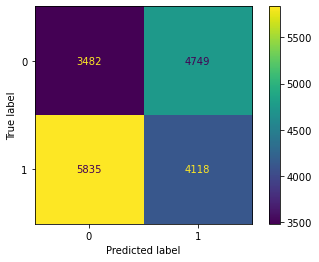

In [50]:
create_confusion_matrix_plot(loaded_model, X_test_scaled, y_test)

### MLFlow model registry
- Run the below command from the terminal first before creating experiment and registering it
- `mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0 --port 5003`

In [51]:
import mlflow
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    mlflow.set_tracking_uri("http://localhost:5003") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Voting_Classifier")
        mlflow.set_tags({"tag2":"Flight_Satisfaction", "tag3":"Production"})
        mlflow.sklearn.log_model(model, "model",registered_model_name="Flight-satisfaction")

In [52]:
# Naming the experiments for MLflow Tuned model
from datetime import datetime
experiment_name = "Flight_Satisfaction" + str(datetime.now().strftime("%d-%m-%y")) ##Tuned classifier
run_name="Flight_Satisfaction_Voting_Classifier" +str(datetime.now().strftime("%d-%m-%y"))
run_metrics = get_metrics(y_test, y_pred)
create_exp_and_register_model(experiment_name,run_name,run_metrics,loaded_model, confusion_matrix_path = 'images/confusion_matrix.png')

2023/01/18 21:50:14 INFO mlflow.tracking.fluent: Experiment with name 'Flight_Satisfaction18-01-23' does not exist. Creating a new experiment.
/Users/gowthamswaminathan/.local/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'Flight-satisfaction'.
2023/01/18 21:50:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Flight-satisfaction, version 1
Created version '1' of model 'Flight-satisfaction'.


### Transitioning MLFlow model to production stage

In [53]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="Flight-satisfaction",
    version=1,
    stage="Production"
)

<ModelVersion: creation_timestamp=1674058823371, current_stage='Production', description='', last_updated_timestamp=1674058837904, name='Flight-satisfaction', run_id='4b29ab5ad518423ab3cfa9ad56ef6a43', run_link='', source='./artifacts/1/4b29ab5ad518423ab3cfa9ad56ef6a43/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [54]:
# Predicting the test data with the Transistioned model

import mlflow.pyfunc

model_name = "Flight-satisfaction"
stage = 'Production'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(X_test_scaled)
print(y_pred)

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


[0 1 0 ... 0 1 0]


### MLFlow model serving

**Run this from command line**
-  use `set MLFLOW_TRACKING_URI=http://localhost:5003` for windows
- use `export MLFLOW_TRACKING_URI=http://localhost:5003` if in linux/mac

## **Now run this command from command line**

make sure we use to write the different port - other than the one you used while starting mlflow server

`mlflow models serve --model-uri models:/Flight-satisfaction/Production -p 6002 --env-manager=local`

In [2]:
# Predicting the results using endpiont created by serving the model

import requests
import pandas as pd
X_test_scaled = pd.read_csv('data/test_data.csv')
lst = X_test_scaled.values.tolist()
inference_request = {
        "data": lst
}
endpoint = "http://localhost:6002/invocations"
response = requests.post(endpoint, json=inference_request)
print(response)

<Response [200]>


In [3]:
print(response.text)

[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 